# **1. Develop Deep Learning Models With Keras**

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical

## 1.1. Keras Model Life-Cycle

Step 1. Define Network

In [4]:
model = Sequential() 
model.add(Dense(100, input_dim=2)) # Visible layer
model.add(Activation('relu'))  # Activate function
model.add(Dense(20))  # Hidden layer with 20 node
model.add(Activation('sigmoid')) # Output layer

Step 2. Compile Network

In [5]:
opt = SGD(learning_rate=0.1, momentum=0.3)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

Step 3. Fit Network

In [6]:
from sklearn.datasets import make_blobs
def create_dataset():
  # generate 2d classification dataset
  X, y = make_blobs(n_samples=1000, centers=20, n_features=100, cluster_std=2,
      random_state=2)
  # one hot encode output variable
  y = to_categorical(y)
  # split into train and test
  n_train = 500
  trainX, testX = X[:n_train, :], X[n_train:, :]
  trainy, testy = y[:n_train], y[n_train:]
  return trainX, trainy, testX, testy
trainX, trainy, testX, testy = create_dataset()

In [7]:
history = model.fit(trainX, trainy, batch_size=10, epochs=100, verbose=0)

ValueError: ignored

Step 4. Evaluate Network

In [ ]:
loss, accuracy = model.evaluate(trainX, trainy, verbose=0)

Step 5. Make Predictions

In [ ]:
predictions = model.predict(testX, verbose=0)

## 1.2. Keras Functional Models

### 1.2.1. Defining Input

In [ ]:
from keras.layers import Input
visible = Input(shape=(2,))

### 1.2.2 Connecting Layers

In [ ]:
from keras.layers import Input
from keras.layers import Dense
visible = Input(shape=(2,))
hidden = Dense(2)(visible)

### 1.2.3 Creating the Model

In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
visible = Input(shape=(2,))
hidden = Dense(2)(visible)
model = Model(inputs=visible, outputs=hidden)

## 1.3.Standard Network Models

### 1.3.1 Multilayer Perceptron

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________


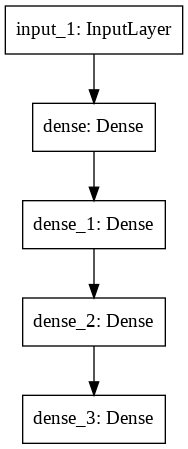

In [ ]:
#Multilayer Perceptron
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense

visible = Input(shape = (10,))
hidden1 = Dense(10, activation = 'relu') (visible)
hidden2 = Dense(20, activation = 'relu') (hidden1)
hidden3 = Dense(10, activation = 'relu') (hidden2)
output = Dense(1, activation = 'sigmoid') (hidden3)
model = Model(inputs = visible, outputs = output)

# summarize layers
model.summary()
# plot graph
plot_model(model, to_file='multilayer_perceptron_graph.png')

### 1.3.2. Convolutional Neural Network

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 61, 61, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 16)        8208      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
dense_4 (Dense)              (None, 13, 13, 10)        170       
_________________________________________________________________
dense_5 (Dense)              (None, 13, 13, 1)         11  

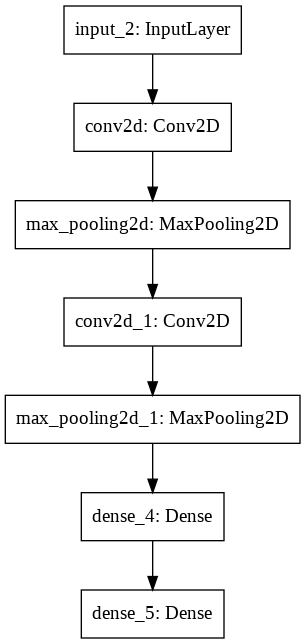

In [ ]:
# Convolutional Neural Network
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
visible = Input(shape=(64,64,1))
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible) 
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(16, kernel_size=4, activation='relu')(pool1) 
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
hidden1 = Dense(10, activation='relu')(pool2) 
output = Dense(1, activation='sigmoid')(hidden1) 
model = Model(inputs=visible, outputs=output)
# summarize layers
model.summary()
# plot graph
plot_model(model, to_file='convolutional_neural_network.png')

### 1.3.3. Recurrent Neural Network

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100, 1)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 10)                480       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


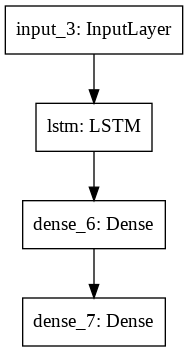

In [ ]:
# Recurrent Neural Network
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.recurrent import LSTM
visible = Input(shape=(100,1))
hidden1 = LSTM(10)(visible)
hidden2 = Dense(10, activation='relu')(hidden1) 
output = Dense(1, activation='sigmoid')(hidden2) 
model = Model(inputs=visible, outputs=output)
# summarize layers
model.summary()
# plot graph
plot_model(model, to_file='recurrent_neural_network.png')

# **Data Preparation**

# **2.  Clean Text Manually and with NLTK**

## 2.1.Manual Tokenization

### 2.1.1. Load Data


In [ ]:
# load text
filename = '/content/drive/MyDrive/Dataset/metamorphosis clean.txt' 
file = open(filename, 'rt')
text = file.read()
file.close()

In [ ]:
type(text)

str

### 2.1.2. Split by Whitespace

In [ ]:
# split into words by white space
words = text.split()
print(words[:100])

['\ufeffThe', 'Project', 'Gutenberg', 'EBook', 'of', 'Metamorphosis,', 'by', 'Franz', 'Kafka', 'Translated', 'by', 'David', 'Wyllie.', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever.', 'You', 'may', 'copy', 'it,', 'give', 'it', 'away', 'or', 're-use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or', 'online', 'at', 'www.gutenberg.org', '**', 'This', 'is', 'a', 'COPYRIGHTED', 'Project', 'Gutenberg', 'eBook,', 'Details', 'Below', '**', '**', 'Please', 'follow', 'the', 'copyright', 'guidelines', 'in', 'this', 'file.', '**', 'Title:', 'Metamorphosis', 'Author:', 'Franz', 'Kafka', 'Translator:', 'David', 'Wyllie', 'Release', 'Date:', 'August', '16,', '2005', '[EBook', '#5200]', 'First', 'posted:', 'May', '13,', '2002', 'Last', 'updated:']


In [ ]:
len(words)

25186

### 2.1.3. Select Words

In [ ]:
import re
# load text
filename = '/content/drive/MyDrive/Dataset/metamorphosis clean.txt' 
file = open(filename, 'rt')
text = file.read()
file.close()
# split based on words only
words = re.split(r'\W+', text) 
print(words[:100])

['', 'The', 'Project', 'Gutenberg', 'EBook', 'of', 'Metamorphosis', 'by', 'Franz', 'Kafka', 'Translated', 'by', 'David', 'Wyllie', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', 'You', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 're', 'use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or', 'online', 'at', 'www', 'gutenberg', 'org', 'This', 'is', 'a', 'COPYRIGHTED', 'Project', 'Gutenberg', 'eBook', 'Details', 'Below', 'Please', 'follow', 'the', 'copyright', 'guidelines', 'in', 'this', 'file', 'Title', 'Metamorphosis', 'Author', 'Franz', 'Kafka', 'Translator', 'David', 'Wyllie', 'Release', 'Date', 'August', '16', '2005', 'EBook', '5200', 'First', 'posted', 'May', '13', '2002', 'Last', 'updated']


### 2.1.4. Split by Whitespace and Remove Punctuation

In [ ]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
import string
import re
# load text
filename = '/content/drive/MyDrive/Dataset/metamorphosis clean.txt'  
file = open(filename, 'rt')
text = file.read()
file.close()
# split into words by white space
words = text.split()

# prepare regex for char filtering
re_punc = re.compile('[%s]' % re.escape(string.punctuation)) 

# remove punctuation from each word
stripped = [re_punc.sub('', w) for w in words] 
print(stripped[:100])

['\ufeffThe', 'Project', 'Gutenberg', 'EBook', 'of', 'Metamorphosis', 'by', 'Franz', 'Kafka', 'Translated', 'by', 'David', 'Wyllie', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', 'You', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 'reuse', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or', 'online', 'at', 'wwwgutenbergorg', '', 'This', 'is', 'a', 'COPYRIGHTED', 'Project', 'Gutenberg', 'eBook', 'Details', 'Below', '', '', 'Please', 'follow', 'the', 'copyright', 'guidelines', 'in', 'this', 'file', '', 'Title', 'Metamorphosis', 'Author', 'Franz', 'Kafka', 'Translator', 'David', 'Wyllie', 'Release', 'Date', 'August', '16', '2005', 'EBook', '5200', 'First', 'posted', 'May', '13', '2002', 'Last', 'updated']


In [ ]:
re_print = re.compile('[^%s]'% re.escape(string.printable))
result = [re_print.sub('', w) for w in words]
print(result[:100])

['The', 'Project', 'Gutenberg', 'EBook', 'of', 'Metamorphosis,', 'by', 'Franz', 'Kafka', 'Translated', 'by', 'David', 'Wyllie.', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever.', 'You', 'may', 'copy', 'it,', 'give', 'it', 'away', 'or', 're-use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or', 'online', 'at', 'www.gutenberg.org', '**', 'This', 'is', 'a', 'COPYRIGHTED', 'Project', 'Gutenberg', 'eBook,', 'Details', 'Below', '**', '**', 'Please', 'follow', 'the', 'copyright', 'guidelines', 'in', 'this', 'file.', '**', 'Title:', 'Metamorphosis', 'Author:', 'Franz', 'Kafka', 'Translator:', 'David', 'Wyllie', 'Release', 'Date:', 'August', '16,', '2005', '[EBook', '#5200]', 'First', 'posted:', 'May', '13,', '2002', 'Last', 'updated:']


### 2.1.5. Normalizing Case

In [ ]:
# convert to lower case
words = [word.lower() for word in words]
print(words[:100])

['\ufeffthe', 'project', 'gutenberg', 'ebook', 'of', 'metamorphosis,', 'by', 'franz', 'kafka', 'translated', 'by', 'david', 'wyllie.', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever.', 'you', 'may', 'copy', 'it,', 'give', 'it', 'away', 'or', 're-use', 'it', 'under', 'the', 'terms', 'of', 'the', 'project', 'gutenberg', 'license', 'included', 'with', 'this', 'ebook', 'or', 'online', 'at', 'www.gutenberg.org', '**', 'this', 'is', 'a', 'copyrighted', 'project', 'gutenberg', 'ebook,', 'details', 'below', '**', '**', 'please', 'follow', 'the', 'copyright', 'guidelines', 'in', 'this', 'file.', '**', 'title:', 'metamorphosis', 'author:', 'franz', 'kafka', 'translator:', 'david', 'wyllie', 'release', 'date:', 'august', '16,', '2005', '[ebook', '#5200]', 'first', 'posted:', 'may', '13,', '2002', 'last', 'updated:']


## 2.2. Tokenization and Cleaning with NLTK

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### 2.2.1. Split into Sentences

In [ ]:
from nltk import sent_tokenize
# load data
filename = '/content/drive/MyDrive/Dataset/metamorphosis clean.txt' 
file = open(filename, 'rt')
text = file.read()
file.close()
# split into sentences
sentences = sent_tokenize(text)
print(sentences[0])

﻿The Project Gutenberg EBook of Metamorphosis, by Franz Kafka
Translated by David Wyllie.


### 2.2.2. Split into Words

In [ ]:
from nltk.tokenize import word_tokenize
# load data
filename = '/content/drive/MyDrive/Dataset/metamorphosis clean.txt'
file = open(filename, 'rt')
text = file.read()
file.close()

#split into words
tokens = word_tokenize(text)


print(tokens[:100])

['\ufeffThe', 'Project', 'Gutenberg', 'EBook', 'of', 'Metamorphosis', ',', 'by', 'Franz', 'Kafka', 'Translated', 'by', 'David', 'Wyllie', '.', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', '.', 'You', 'may', 'copy', 'it', ',', 'give', 'it', 'away', 'or', 're-use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or', 'online', 'at', 'www.gutenberg.org', '**', 'This', 'is', 'a', 'COPYRIGHTED', 'Project', 'Gutenberg', 'eBook', ',', 'Details', 'Below', '**', '**', 'Please', 'follow', 'the', 'copyright', 'guidelines', 'in', 'this', 'file', '.', '**', 'Title', ':', 'Metamorphosis', 'Author', ':', 'Franz', 'Kafka', 'Translator', ':', 'David', 'Wyllie', 'Release', 'Date', ':', 'August', '16']


### 2.2.3. Filter Out Punctuation

In [ ]:
from nltk.tokenize import word_tokenize
# load data
filename = '/content/drive/MyDrive/Dataset/metamorphosis clean.txt'
file = open(filename, 'rt')
text = file.read()
file.close()

#split into words
tokens = word_tokenize(text)

# remove all tokens that are not alphabetic
words = [word for word in tokens if word.isalpha()]
print(words[:100])

['Project', 'Gutenberg', 'EBook', 'of', 'Metamorphosis', 'by', 'Franz', 'Kafka', 'Translated', 'by', 'David', 'Wyllie', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', 'You', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or', 'online', 'at', 'This', 'is', 'a', 'COPYRIGHTED', 'Project', 'Gutenberg', 'eBook', 'Details', 'Below', 'Please', 'follow', 'the', 'copyright', 'guidelines', 'in', 'this', 'file', 'Title', 'Metamorphosis', 'Author', 'Franz', 'Kafka', 'Translator', 'David', 'Wyllie', 'Release', 'Date', 'August', 'EBook', 'First', 'posted', 'May', 'Last', 'updated', 'May', 'Language', 'English', 'START', 'OF', 'THIS', 'PROJECT', 'GUTENBERG', 'EBOOK', 'METAMORPHOSIS', 'Copyright', 'C']


### 2.2.4. Filter out Stop Words (and Pipeline)

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

Let’s demonstrate this with a small pipeline of text preparation including:
- 1.Load the raw text.
- 2.Split into tokens.
- 3.Convert to lowercase.
- 4.Remove punctuation from each token.
- 5.Filter out remaining tokens that are not alphabetic. 
- 6.Filter out tokens that are stop words.


In [ ]:
import string
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# 1. load data
filename = '/content/drive/MyDrive/Dataset/metamorphosis clean.txt'
file = open(filename, 'rt')
text = file.read()
file.close()

# 2. split into words
tokens = word_tokenize(text)

# 3. Convert to lower case
tokens = [w.lower() for w in tokens]

# prepare regex for char filtering
re_punc = re.compile('[%s]' % re.escape(string.punctuation))

# 4. remove punctuation from each word
stripped = [re_punc.sub('',w) for w in tokens]

# 5. remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]

# 6. filter out stop words
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
print(words[:100])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['project', 'gutenberg', 'ebook', 'metamorphosis', 'franz', 'kafka', 'translated', 'david', 'wyllie', 'ebook', 'use', 'anyone', 'anywhere', 'cost', 'almost', 'restrictions', 'whatsoever', 'may', 'copy', 'give', 'away', 'reuse', 'terms', 'project', 'gutenberg', 'license', 'included', 'ebook', 'online', 'wwwgutenbergorg', 'copyrighted', 'project', 'gutenberg', 'ebook', 'details', 'please', 'follow', 'copyright', 'guidelines', 'file', 'title', 'metamorphosis', 'author', 'franz', 'kafka', 'translator', 'david', 'wyllie', 'release', 'date', 'august', 'ebook', 'first', 'posted', 'may', 'last', 'updated', 'may', 'language', 'english', 'start', 'project', 'gutenberg', 'ebook', 'metamorphosis', 'copyright', 'c', 'david', 'wyllie', 'metamorphosis', 'franz', 'kafka', 'translated

### 2.2.5. Stem Words

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
# load data
filename = '/content/drive/MyDrive/Dataset/metamorphosis clean.txt'
file = open(filename, 'rt')
text = file.read()
file.close()
# split into words
tokens = word_tokenize(text)
# stemming of words
porter = PorterStemmer()
stemmed = [porter.stem(word) for word in tokens] 
print(stemmed[:100])

['\ufeffthe', 'project', 'gutenberg', 'ebook', 'of', 'metamorphosi', ',', 'by', 'franz', 'kafka', 'translat', 'by', 'david', 'wylli', '.', 'thi', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyon', 'anywher', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrict', 'whatsoev', '.', 'you', 'may', 'copi', 'it', ',', 'give', 'it', 'away', 'or', 're-us', 'it', 'under', 'the', 'term', 'of', 'the', 'project', 'gutenberg', 'licens', 'includ', 'with', 'thi', 'ebook', 'or', 'onlin', 'at', 'www.gutenberg.org', '**', 'thi', 'is', 'a', 'copyright', 'project', 'gutenberg', 'ebook', ',', 'detail', 'below', '**', '**', 'pleas', 'follow', 'the', 'copyright', 'guidelin', 'in', 'thi', 'file', '.', '**', 'titl', ':', 'metamorphosi', 'author', ':', 'franz', 'kafka', 'translat', ':', 'david', 'wylli', 'releas', 'date', ':', 'august', '16']


# **3. Bag-of-Words Model**


- How to convert text to word count vectors with CountVectorizer.
- How to convert text to word frequency vectors with TfidfVectorizer. 
- How to convert text to unique integers with HashingVectorizer.


## 3.1. Word Counts with CountVectorizer 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]

# create the transform
vectorizer = CountVectorizer()

# tokenize and build vocab
vectorizer.fit(text)

# summarize
print(vectorizer.vocabulary_)

# encode document
vector = vectorizer.transform(text)

# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
(1, 8)
<class 'scipy.sparse.csr.csr_matrix'>
[[1 1 1 1 1 1 1 2]]


In [ ]:
# encode another document
text2 = ["the puppy"]
vector = vectorizer.transform(text2)
print(vector.toarray())

[[0 0 0 0 0 0 0 1]]


In [ ]:
# encode another document
text3 = ["puppy the"]
vector = vectorizer.transform(text3)
print(vector.toarray())

[[0 0 0 0 0 0 0 1]]


## 3.2. Word Frequencies with TfidfVectorizer

- **Term Frequency**: This summarizes how often a given word appears within a document. 
- **Inverse Document Frequency**: This downscales words that appear a lot across documents.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog.",
"The dog.",
    "The fox"]
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
vector = vectorizer.transform([text[0]])
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
[1.69314718 1.28768207 1.28768207 1.69314718 1.69314718 1.69314718
 1.69314718 1.        ]
(1, 8)
[[0.36388646 0.27674503 0.27674503 0.36388646 0.36388646 0.36388646
  0.36388646 0.42983441]]


## 3.3. Hashing with HashingVectorizer

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]
# create the transform
vectorizer = HashingVectorizer(n_features=20)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

(1, 20)
[[ 0.          0.          0.          0.          0.          0.33333333
   0.         -0.33333333  0.33333333  0.          0.          0.33333333
   0.          0.          0.         -0.33333333  0.          0.
  -0.66666667  0.        ]]


# **4. Prepare Text Data With Keras**

## 4.1. Text to word sequence

- Splits words by space.
- Filters out punctuation.
- Converts text to lowercase (lower=True).

In [ ]:
from keras.preprocessing.text import text_to_word_sequence
# define the document
text = 'The quick brown fox jumped over the lazy dog.'
# tokenize the document
result = text_to_word_sequence(text)
print(result)

['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']


## 4.2. Encoding with one hot

In [ ]:
from keras.preprocessing.text import text_to_word_sequence 
from keras.preprocessing.text import one_hot
# define the document
text = 'The quick brown fox jumped over the lazy dog.'

# estimate the size of the vocabulary
words = set(text_to_word_sequence(text))
vocab_size = len(words)
print(vocab_size)

# integer encode the document
result = one_hot(text, round(vocab_size*1.3)) 
print(result)

8
[7, 5, 8, 2, 8, 7, 7, 7, 1]


## 4.3. Hash Encoding with hashing trick


In [ ]:
from keras.preprocessing.text import hashing_trick
from keras.preprocessing.text import text_to_word_sequence 
# define the document
text = 'The quick brown fox jumped over the lazy dog.'
# estimate the size of the vocabulary
words = set(text_to_word_sequence(text))
vocab_size = len(words)
print(vocab_size)
# integer encode the document
result = hashing_trick(text, round(vocab_size*1.3), hash_function='md5') 
print(result)

8
[6, 4, 1, 2, 7, 5, 6, 2, 6]


## 4.4. Tokenizer API

In [ ]:
from keras.preprocessing.text import Tokenizer 
# define 5 documents
docs = ['Well done!',
      'Good work', 'Great effort', 'nice work', 'Excellent!']  

# create the tokenizer
t = Tokenizer()

# fit the tokenizer on the documents
t.fit_on_texts(docs)

- word counts: A dictionary of words and their counts.
- word docs: An integer count of the total number of documents that were used to fit the Tokenizer.
- word index: A dictionary of words and their uniquely assigned integers.
- document count: A dictionary of words and how many documents each appeared in.

In [ ]:
# summarize what was learned
print(t.word_counts)
print(t.document_count)
print(t.word_index)
print(t.word_docs)

OrderedDict([('well', 1), ('done', 1), ('good', 1), ('work', 2), ('great', 1), ('effort', 1), ('nice', 1), ('excellent', 1)])
5
{'work': 1, 'well': 2, 'done': 3, 'good': 4, 'great': 5, 'effort': 6, 'nice': 7, 'excellent': 8}
defaultdict(<class 'int'>, {'done': 1, 'well': 1, 'work': 2, 'good': 1, 'effort': 1, 'great': 1, 'nice': 1, 'excellent': 1})


The texts to matrix() function

- binary: Whether or not each word is present in the document. This is the default.
- count: The count of each word in the document.
- tfidf: The Text Frequency-Inverse DocumentFrequency (TF-IDF) scoring for each word in the document.
- freq: The frequency of each word as a ratio of words within each document.

In [ ]:
from keras.preprocessing.text import Tokenizer 
# define 5 documents
docs = ['Well done!',
'Good work', 'Great effort', 'nice work', 'Excellent!']

# create the tokenizer
t = Tokenizer()

# fit the tokenizer on the documents
t.fit_on_texts(docs)

# summarize what was learned
print(t.word_counts)
print(t.document_count)
print(t.word_index)
print(t.word_docs)

OrderedDict([('well', 1), ('done', 1), ('good', 1), ('work', 2), ('great', 1), ('effort', 1), ('nice', 1), ('excellent', 1)])
5
{'work': 1, 'well': 2, 'done': 3, 'good': 4, 'great': 5, 'effort': 6, 'nice': 7, 'excellent': 8}
defaultdict(<class 'int'>, {'done': 1, 'well': 1, 'work': 2, 'good': 1, 'effort': 1, 'great': 1, 'nice': 1, 'excellent': 1})


In [ ]:
# integer encode documents: count mode => The count of each word in the document
encoded_docs = t.texts_to_matrix(docs, mode='count') 
print(encoded_docs)

[[0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
# integer encode documents: "binary" => Whether or not each word is present in the document. 
encoded_docs = t.texts_to_matrix(docs, mode='binary') 
print(encoded_docs)

[[0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
# integer encode documents: "tfidf" => he Text Frequency-Inverse DocumentFrequency (TF-IDF) scoring for each word in the document.
encoded_docs = t.texts_to_matrix(docs, mode='tfidf') 
print(encoded_docs)

[[0.         0.         1.25276297 1.25276297 0.         0.
  0.         0.         0.        ]
 [0.         0.98082925 0.         0.         1.25276297 0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.25276297
  1.25276297 0.         0.        ]
 [0.         0.98082925 0.         0.         0.         0.
  0.         1.25276297 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         1.25276297]]


In [ ]:
# integer encode documents: "freq" => The frequency of each word as a ratio of words within each document.
encoded_docs = t.texts_to_matrix(docs, mode='freq') 
print(encoded_docs)

[[0.  0.  0.5 0.5 0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.5 0.  0. ]
 [0.  0.5 0.  0.  0.  0.  0.  0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  1. ]]
